In [16]:
import os 
import mesaPlot as mp
import numpy as np
import astropy.units as u
import astropy.constants as c 
import mesa_reader as mr

import matplotlib.pyplot as plt
from ipywidgets import FloatProgress
from IPython.display import display, clear_output




mesa_dir = '/Users/janton/mesa-r10398/' 
work_dir = '/Users/janton/mesa-r10398/star/test_suite/HeliumCores2/'
plot_results_dir = '/Users/janton/Desktop'

def prepare_canvas():
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.rcParams['axes.linewidth'] = 3
    plt.legend(prop={'size': 16})
    
    fontsize = 20
    ax = plt.gca()
    ax.tick_params(direction='in',length=5)
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        tick.label1.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        tick.label1.set_fontweight('bold')


def capture_density(t,rho_0,Q,t_comp,ft):
    rho = rho_0/(1 + (3*c.k_B*t/Q)* np.log(2*np.log(2)*(c.k_B*t/(c.m_e*c.c**2))**5 * (Q/(c.k_B*t))**2 * (t_comp/ft)))
    return rho 
    


def logrhoc_logTc(data,
                  labels,
                  mesa_dir = mesa_dir, 
                  xlim=None,
                  ylim=None,
                  ecap_density_corrections=True,
                  t_comp=1e4*u.yr):
    
    
 #   hydrogen_burning_line = os.path.join(mesa_dir,'data/star_data/plot_info/hydrogen_burn.data')
    helium_burning_line = os.path.join(mesa_dir,'data/star_data/plot_info/helium_burn.data')
    carbon_burning_line = os.path.join(mesa_dir,'data/star_data/plot_info/carbon_burn.data')
    oxygen_burning_line = os.path.join(mesa_dir,'data/star_data/plot_info/oxygen_burn.data')
    electron_degeneracy_line = os.path.join(mesa_dir,'data/star_data/plot_info/psi4.data')
    
    
 #   hburn = np.genfromtxt(hydrogen_burning_line)
    heburn = np.genfromtxt(helium_burning_line)
    cburn = np.genfromtxt(carbon_burning_line)
    oburn = np.genfromtxt(oxygen_burning_line)
    electron = np.genfromtxt(electron_degeneracy_line)

    # Radiation pressure line 
    logrho = np.arange(-9.0,10.0,0.1)
    logt = np.log10(3.2e7) + (logrho - np.log10(0.7))/3.0


    plt.plot(heburn[:,0],heburn[:,1],ls=':',color='black')
    plt.text(5.1, 7.95, 'He burn', fontsize=22,
               rotation=0, rotation_mode='anchor')


    plt.plot(cburn[:,0],cburn[:,1],ls=':',color='black')
    plt.text(5.1, 8.67, 'C burn', fontsize=22,
               rotation=0, rotation_mode='anchor')


    plt.plot(oburn[:,0],oburn[:,1],ls=':',color='black')
    plt.text(5.1, 9.05, 'O burn', fontsize=22,
               rotation=0, rotation_mode='anchor')

    plt.plot(electron[:,0],electron[:,1],ls='--',color='black')

    plt.plot(logrho,logt,ls='--',color='black')

    plt.text(7.0, 9.5, r'$\epsilon_{\rm F}/k T \simeq 4$', fontsize=22, rotation=0, rotation_mode='anchor')
    
    plt.text(5.12, 9.5, r'$P_{\rm rad}\simeq P_{\rm gas}$', fontsize=22, rotation=0, rotation_mode='anchor')
    

    #Weak reaction lines 
    plt.text(9.05, 7.52, r'$^{25}{\rm Mg}\leftrightarrow ^{25}{\rm Na}$', fontsize=15, rotation=90,verticalalignment='bottom')
    plt.text(9.25, 7.52, r'$^{23}{\rm Na} \leftrightarrow ^{23}{\rm Ne}$', fontsize=15, rotation=90,verticalalignment='bottom')
    plt.text(9.65, 7.52, r'$^{24}{\rm Mg}\rightarrow ^{24}{\rm Na}$', fontsize=15, rotation=90,verticalalignment='bottom')
    plt.text(9.75, 7.52, r'$^{24}{\rm Na}\rightarrow ^{24}{\rm Ne}$', fontsize=15, rotation=90,verticalalignment='bottom')
    plt.text(9.85, 7.52, r'$^{25}{\rm Na}\leftrightarrow ^{25}{\rm Ne}$', fontsize=15, rotation=90,verticalalignment='bottom')
    plt.text(10.00, 7.52, r'$^{20}{\rm Ne}\rightarrow ^{20}{\rm F}\rightarrow  ^{20}{\rm O}$', fontsize=15, rotation=90,verticalalignment='bottom')
    
    
    if ecap_density_corrections:
        t = np.arange(7.5,11,0.1)
        t = 10**t * u.K
        rho_ce = capture_density(t,10**9.96,7.025*u.MeV,t_comp,10**9.801*u.s)
        plt.plot(np.log10(rho_ce),np.log10(t.value),color='red',ls='--')
    else:
        plt.axvline(x=9.96,color='red',ls='-')

    plt.text(10.0, 8.3, r'$e^{-}$cSN', fontsize=15, rotation=90,color='red',verticalalignment='bottom')
    

       
    
    # now loop over data 
    for i in range(len(data)):
        d = data[i]
        plt.plot(d('log_center_Rho'),d('log_center_T'),label=labels[i])
        
    
    #frame & labels 
    xlabel = r'$\log (\rho_{\rm c} / {\rm gr}\,{\rm cm}^{-3})$'
    ylabel = r'$\log (T_{\rm c} / {\rm K})$'
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 
    
    if xlim:
        plt.xlim(xlim)
    else:
        plt.xlim([5,10.5])
    if ylim:
        plt.ylim(ylim)
    else:
        plt.ylim([7.5,10.0])
        
    
    prepare_canvas()
    plt.savefig(os.path.join(plot_results_dir,'Rhoc_vs_Tc.pdf'))
    plt.show()
    

    
    
def mdot_vs_mass(data,labels):

    for i in range(len(data)):
        d = data[i]
        plt.plot(d('star_mass'),d('log_abs_mdot'),label=labels[i])

    
    xlabel = r'Mass [M$_{\odot}]$'
    ylabel = r'$\dot{M}\,{\rm [ M}_{\odot}\,{\rm yr}^{-1}$]'
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 
    
    prepare_canvas()
    plt.ylim([-10,-3.0])
    plt.savefig(os.path.join(plot_results_dir,'mdot_vs_m.pdf'))
    plt.show()
    
    
def hr(data,labels):
    xlabel = r'log Teff [Kelvin]'
    ylabel = r'log Luminosity'
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 
       
    for i in range(len(data)):
        d = data[i]
        he = d('log_LHe')
        filt = np.where(he>1)
        filt = filt[0][0]
        plt.plot(d('log_Teff')[filt:],d('log_L')[filt:],label=labels[i])
    prepare_canvas()
    plt.xlim([5,3])
    plt.savefig(os.path.join(plot_results_dir,'hr.pdf'))
    plt.show()
  


def potential_energy(rad,rho):
    udr = c.G*16./3. * np.pi**2. *rho**2 * rad**4 
    return np.trapz(udr,rad).to(u.erg)





def total_energy(Et,mass):
    Et = Et*u.erg/u.gram 
    mass = (mass*u.Msun)
    
    return (Et*mass).sum().to(u.erg)
    


## Data to plot 

In [133]:

os.path.join(work_dir,'/LOGS/history.data')




data = [mr.MesaData(os.path.join(work_dir,'results/z02/2p2_urca/LOGS/history.data')).data,
        #mr.MesaData(os.path.join(work_dir,'results/z02/2p4_urca/LOGS/history.data')).data,
        #mr.MesaData(os.path.join(work_dir,'results/z02/2p5_urca/LOGS/history.data')).data,
        #mr.MesaData(os.path.join(work_dir,'results/z001/2p3_urca/LOGS/history.data')).data,
        mr.MesaData(os.path.join(work_dir,'LOGS/history.data')).data,]
        
labels = [r'2.2\,M$_{\odot};Z=0.02$ high res urca',
         #r'2.4\,M$_{\odot};Z=0.02$ high res urca',
         #r'2.5\,M$_{\odot};Z=0.02$ high res urca',
         #r'2.3\,M$_{\odot};Z=0.001$ high res urca',
         r'2.3\,M$_{\odot};Z=0.001$ high res urca']

## $\log \rho_{\rm c}$ vs $\log T_{\rm c}$

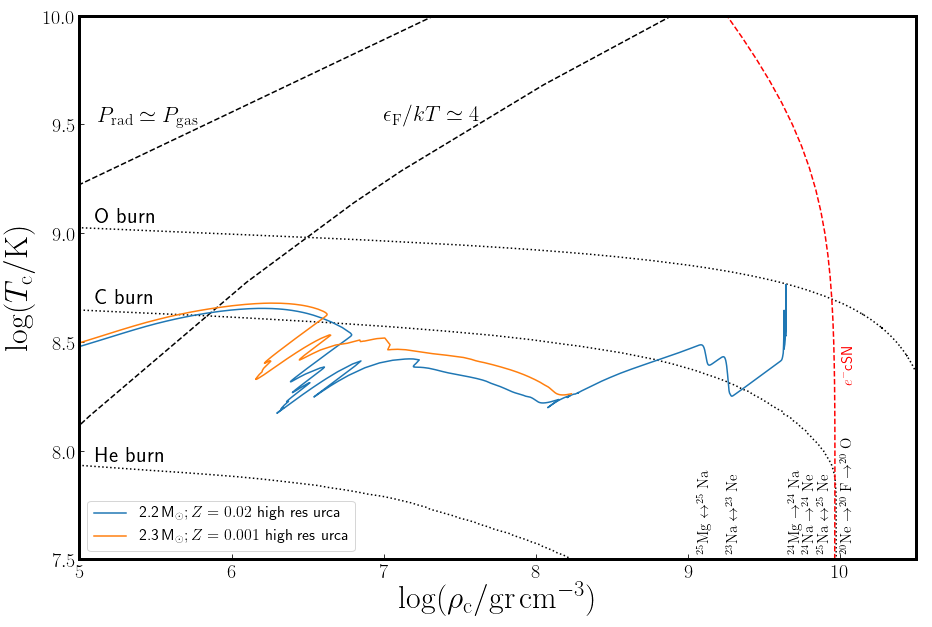

In [134]:
logrhoc_logTc(data,labels)

## Wind 

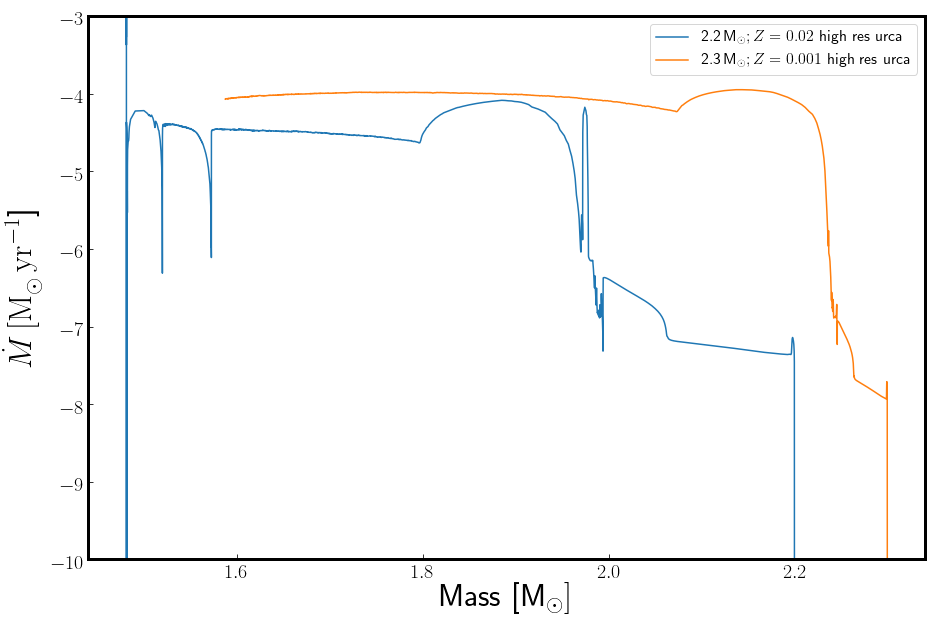

In [129]:
mdot_vs_mass(data,labels)

## HR diagram 

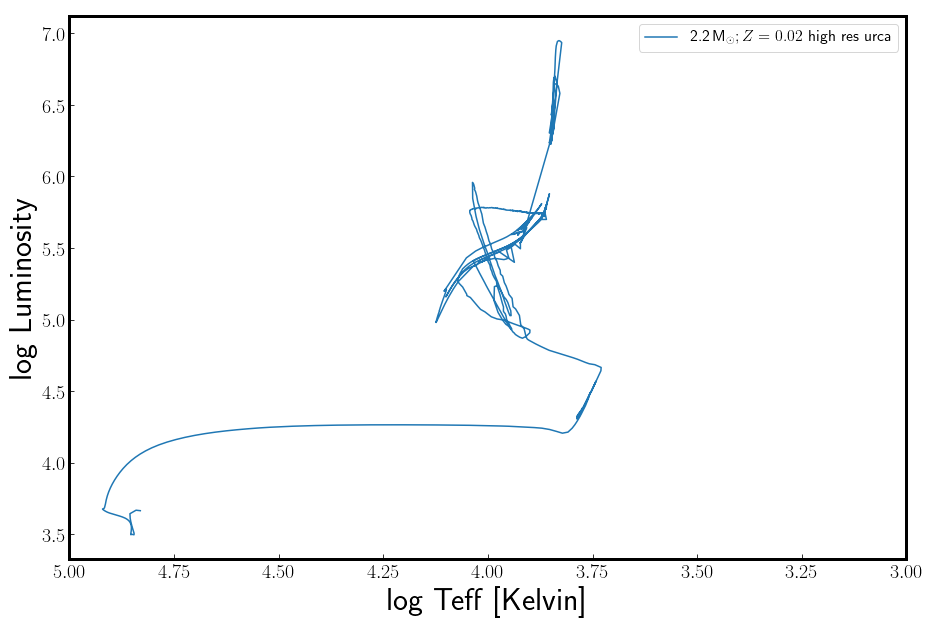

In [117]:
hr(data,labels)

### Energetics

In [118]:
final_profile = mr.MesaData(os.path.join(work_dir,'LOGS/profile4.data')).data
history = mr.MesaData(os.path.join(work_dir,'LOGS/history.data')).data




G = potential_energy(final_profile('radius')*u.Rsun,10**final_profile('logRho')*u.gram/u.cm**3)


print(G)
print( total_energy(final_profile('total_energy'),final_profile('dq')*final_profile('mass')))

#plt.scatter(data2('c_core_mass')[1:],np.diff(data2('c_core_mass'))/(10**(data2('log_dt')[1:])))
#plt.plot(np.log10(data2('star_age')),data2('c_core_mass'))
#plt.xlim([6.45,6.6])
#plt.ylim([0.0,0.00025])

-1.6950543757592715e+51 erg
-8.511369693917913e+50 erg


Thus, in principle $E_{\rm nuc} > E_{\rm bind}$

In [ ]:
m=mp.MESA()
p=mp.plot()
m.loadHistory()
m.loadProfile(num=1)


p.plotKip3(m,xaxis='star_age',age_log=True,
           show_mix=True,mix_alpha=0.3,
           show_mass_loc=False,age_units='years',show_mix_labels=False,mod_min=1070, mod_max=2100,
           zone_frac=5,yrng=[0, 1.2])

m.loadProfile(num=16000)
p.plotAbun(m)